# Load Data and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#load datasets
cab_data = pd.read_csv('/content/gdrive/MyDrive/DataSets-main/Cab_Data.csv')
city =  pd.read_csv('/content/gdrive/MyDrive/DataSets-main/City.csv')
customer_id = pd.read_csv('/content/gdrive/MyDrive/DataSets-main/Customer_ID.csv')
transaction_id = pd.read_csv('/content/gdrive/MyDrive/DataSets-main/Transaction_ID.csv')

# Get information of dataset

In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [6]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


# Get shape of the dataset

In [8]:
cab_data.shape

(359392, 7)

In [9]:
city.shape

(20, 3)

In [10]:
customer_id.shape

(49171, 4)

In [11]:
transaction_id.shape

(440098, 3)

# Check for missing values

In [12]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [13]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [14]:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [15]:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# Check for duplicate values

In [16]:
transaction_id['Customer ID'].duplicated().any()

True

# Merge dataset

In [17]:
merged_data= pd.merge(cab_data, right = transaction_id, left_on='Transaction ID', right_on='Transaction ID')
merged= pd.merge(left = merged_data , right= customer_id, left_on='Customer ID', right_on='Customer ID')
dataset = pd.merge(left = merged , right= city, left_on='City', right_on='City')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [18]:
dataset.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


# Preprocess the datasets(Data Cleaning)

In [19]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date

In [20]:
dataset['Date of Travel'] = dataset['Date of Travel'].apply(lambda x:to_date_format(x))

In [21]:
dataset.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,2017-06-22,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [22]:
#remove commas from Population and Users columns values.
dataset['Population'] = dataset['Population'].str.replace(',','').astype(int)
dataset['Users'] = dataset['Users'].str.replace(',','').astype(int)

In [23]:
dataset.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,2017-06-22,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [24]:
dataset['Profit'] = dataset['Price Charged'] - dataset['Cost of Trip']

In [25]:
dataset.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,50.8912
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701,25.0960
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,210.0920
9,10186994,2017-06-22,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701,118.9736


In [26]:
dataset.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


# QUESTION1: Which company earns more profit

In [27]:
#calculate the total profit of each company
profit_sum = dataset.groupby('Company')['Profit'].sum()
profit_sum

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [28]:
Company = ['Pink Cab','Yellow Cab']
Total_profit = [5.307328e+06, 4.402037e+07]

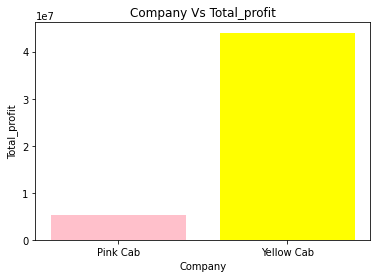

In [29]:
plt.bar(Company,Total_profit,color = ['Pink','Yellow'])
plt.title('Company Vs Total_profit')
plt.xlabel('Company')
plt.ylabel('Total_profit')
plt.show()

In [30]:
#display the total profit per city for each company
profit_sum_city = dataset.groupby(['City','Company'])['Profit'].sum()
profit_sum_city

City            Company   
ATLANTA GA      Pink Cab      9.605008e+04
                Yellow Cab    7.463828e+05
AUSTIN TX       Pink Cab      1.474453e+05
                Yellow Cab    3.792557e+05
BOSTON MA       Pink Cab      2.620017e+05
                Yellow Cab    1.506718e+06
CHICAGO IL      Pink Cab      3.187225e+05
                Yellow Cab    3.068591e+06
DALLAS TX       Pink Cab      2.473011e+04
                Yellow Cab    1.104003e+06
DENVER CO       Pink Cab      4.058494e+04
                Yellow Cab    3.570001e+05
LOS ANGELES CA  Pink Cab      1.125732e+06
                Yellow Cab    3.285977e+06
MIAMI FL        Pink Cab      1.623012e+05
                Yellow Cab    5.960001e+05
NASHVILLE TN    Pink Cab      6.428453e+04
                Yellow Cab    8.524768e+04
NEW YORK NY     Pink Cab      1.511474e+06
                Yellow Cab    2.645108e+07
ORANGE COUNTY   Pink Cab      1.019958e+05
                Yellow Cab    3.550060e+05
PHOENIX AZ      Pink Cab   

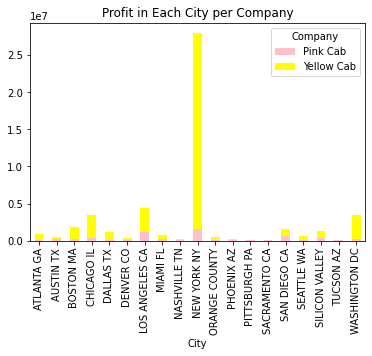

In [31]:
profit_sum_city.unstack().plot(kind='bar', stacked=True, color = ('pink','yellow'),title = "Profit in Each City per Company")

# QUESTION2: Which company is more favored by the customers

In [32]:
#calculate the number of unique customers for each company
unique_customer_company = dataset.groupby(['Company'])['Customer ID'].nunique()
unique_customer_company

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

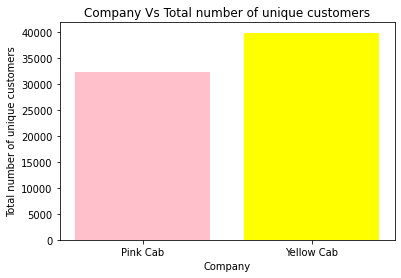

In [33]:
Company = ['Pink Cab','Yellow Cab']
Total_unique_customers = [32330, 39896]
plt.bar(Company,Total_unique_customers,color = ['Pink','Yellow'])
plt.title('Company Vs Total number of unique customers')
plt.xlabel('Company')
plt.ylabel('Total number of unique customers')
plt.show()

In [34]:
#display the number of unique customers per city for each company
unique_number_of_customer_city = dataset.groupby(['City','Company'])['Customer ID'].nunique()
unique_number_of_customer_city

City            Company   
ATLANTA GA      Pink Cab      1322
                Yellow Cab    2595
AUSTIN TX       Pink Cab      1354
                Yellow Cab    1914
BOSTON MA       Pink Cab      2463
                Yellow Cab    2997
CHICAGO IL      Pink Cab      2859
                Yellow Cab    3000
DALLAS TX       Pink Cab      1118
                Yellow Cab    2564
DENVER CO       Pink Cab      1145
                Yellow Cab    1681
LOS ANGELES CA  Pink Cab      2996
                Yellow Cab    2998
MIAMI FL        Pink Cab      1480
                Yellow Cab    2334
NASHVILLE TN    Pink Cab      1356
                Yellow Cab     965
NEW YORK NY     Pink Cab      2972
                Yellow Cab    3000
ORANGE COUNTY   Pink Cab      1198
                Yellow Cab    1712
PHOENIX AZ      Pink Cab       763
                Yellow Cab     994
PITTSBURGH PA   Pink Cab       604
                Yellow Cab     574
SACRAMENTO CA   Pink Cab      1078
                Yellow Cab  

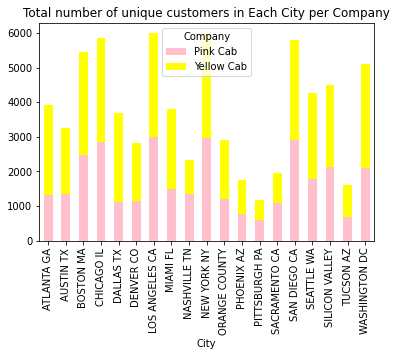

In [35]:
unique_number_of_customer_city.unstack().plot(kind='bar', stacked=True, color = ('pink','yellow'),title = "Total number of unique customers in Each City per Company")

# QUESTION 3 : WHICH COMPANY HAS A LARGER NUMBER OF TRIPS

In [36]:
#calculate the number of taxi rides per company
taxi_rides_company = dataset['Company'].value_counts()
taxi_rides_company

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

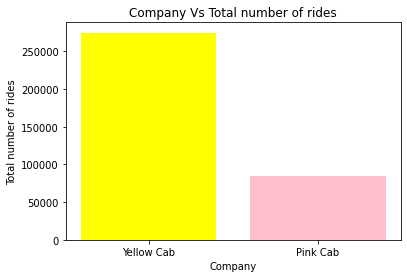

In [37]:
Company = ['Yellow Cab','Pink Cab']
Total_number_of_rides = [274681, 84711]
plt.bar(Company,Total_number_of_rides,color = ['Yellow','Pink'])
plt.title('Company Vs Total number of rides')
plt.xlabel('Company')
plt.ylabel('Total number of rides')
plt.show()

In [38]:
dataset['COUNTER'] = 1
rides_num_company = dataset.groupby(['City','Company'])['COUNTER'].sum()
print(rides_num_company)

City            Company   
ATLANTA GA      Pink Cab       1762
                Yellow Cab     5795
AUSTIN TX       Pink Cab       1868
                Yellow Cab     3028
BOSTON MA       Pink Cab       5186
                Yellow Cab    24506
CHICAGO IL      Pink Cab       9361
                Yellow Cab    47264
DALLAS TX       Pink Cab       1380
                Yellow Cab     5637
DENVER CO       Pink Cab       1394
                Yellow Cab     2431
LOS ANGELES CA  Pink Cab      19865
                Yellow Cab    28168
MIAMI FL        Pink Cab       2002
                Yellow Cab     4452
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Pink Cab      13967
                Yellow Cab    85918
ORANGE COUNTY   Pink Cab       1513
                Yellow Cab     2469
PHOENIX AZ      Pink Cab        864
                Yellow Cab     1200
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

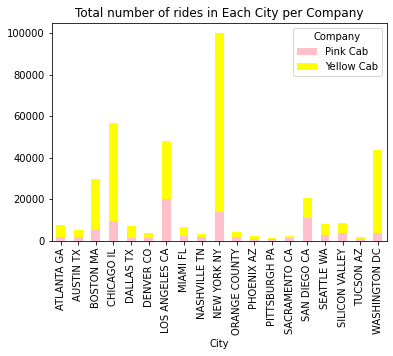

In [39]:
rides_num_company.unstack().plot(kind='bar', stacked=True, color = ('pink','yellow'),title = "Total number of rides in Each City per Company")

# QUESTION4: Does Yellow Cab has a higher average trips per customer?

In [40]:
#calculate average trips per customers for each company
taxi_rides_company = dataset['Company'].value_counts()
average_trips_per_customer = taxi_rides_company/unique_customer_company
average_trips_per_customer

Pink Cab      2.620198
Yellow Cab    6.884926
dtype: float64

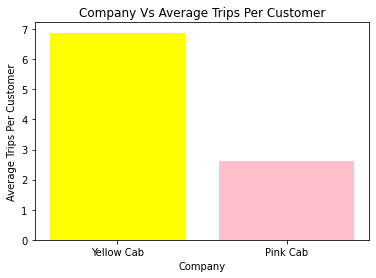

In [41]:
Company = ['Yellow Cab','Pink Cab']
Average_Trips_Per_Customer = [6.884926, 2.620198]
plt.bar(Company,Average_Trips_Per_Customer,color = ['Yellow','Pink'])
plt.title('Company Vs Average Trips Per Customer')
plt.xlabel('Company')
plt.ylabel('Average Trips Per Customer')
plt.show()

# QUESTION5 : Which payment method do customers prefer

In [42]:
dataset['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


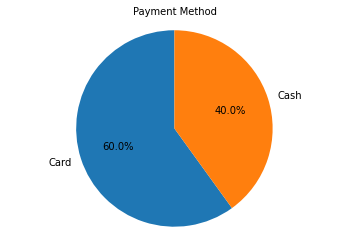

In [43]:
# pie chart of distribution of payment method 
labels = ['Card','Cash']
payment_method = dataset['Payment_Mode'].value_counts()
pie = plt.pie(payment_method, labels=labels,autopct='%.1f%%',explode=None,shadow=False, startangle=90)
plt.axis('equal')
plt.title('Payment Method', fontproperties="SimHei")
plt.show()

In [44]:
dataset['COUNTER'] = 1
payment_company = dataset.groupby(['Payment_Mode','Company'])['COUNTER'].sum()
print(payment_company)

Payment_Mode  Company   
Card          Pink Cab       50719
              Yellow Cab    164785
Cash          Pink Cab       33992
              Yellow Cab    109896
Name: COUNTER, dtype: int64


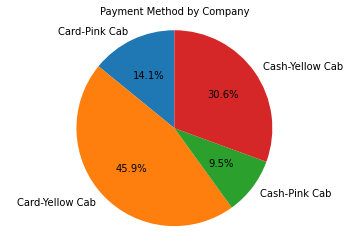

In [45]:
# pie chart of distribution of payment method by company
labels = ['Card-Pink Cab','Card-Yellow Cab','Cash-Pink Cab','Cash-Yellow Cab']
payment_company = dataset.groupby(['Payment_Mode','Company'])['COUNTER'].sum()
pie = plt.pie(payment_company, labels=labels,autopct='%.1f%%',explode=None,shadow=False, startangle=90)
plt.axis('equal')
plt.title('Payment Method by Company', fontproperties="SimHei")
plt.show()

# QUESTION6 : How profit changed over the period

In [46]:
dataset['Year'] = pd.DatetimeIndex(dataset['Date of Travel']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Date of Travel']).month
dataset['Day'] = pd.DatetimeIndex(dataset['Date of Travel']).day

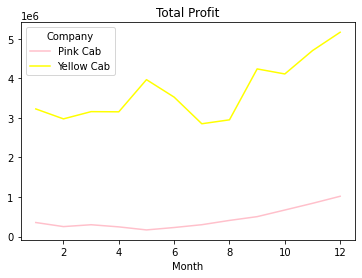

In [47]:
monthly_profit = dataset.groupby(['Month','Company'])['Profit'].sum()
monthly_profit.unstack().plot(kind='line', color = ('pink','yellow'),title = "Total Profit")

# Analysis

1. Yellow Company has a higher profit than Pink Company.

2. Yellow Company and Pink Company have huge amount of customers but the number of rides and the average number of rides per customer of Yellow Company is larger than Pink Company.

Hence, the Yellow Company is a more competitive company to invest.